<a href="https://colab.research.google.com/github/pareshbadgujar2000/EDA-project-hotel-booking-analysis/blob/main/FINAL_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import folium
import plotly.express as px
sns.set()

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isnull().sum().sort_values(ascending = False)[:4]

company     112593
agent        16340
country        488
children         4
dtype: int64

In [ ]:
df["hotel"].replace({"Citi Hotel": "City Hotel", "Reosrt Hotel": "Resort Hotel"}, inplace=True)

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

## Cleaning data
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \

1. Handling missing values/Nan values \
2. Convert columns to appropriate datatypes. \
3. dropping unimportant columns

In [ ]:
df['company']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64

In [ ]:
df.drop('company',axis = 1,inplace=True)

In [ ]:
df.head(5).T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


so here in our dataset , "Agent" and "company" columns have missing values so we replace those values 
"Agent" column we have already drop it

In [ ]:
df['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [ ]:
df['agent'].mode()

0    9.0
dtype: float64

In [ ]:
df['agent'].fillna(value = 9.0, inplace = True)

In [ ]:
df['agent']


0           9.0
1           9.0
2           9.0
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [ ]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
df['country'].fillna('others', inplace = True)

In [ ]:
df['children'].fillna(df['children'].mean(),inplace = True)

In [ ]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending = False)[:4]

hotel                        0
is_repeated_guest            0
reservation_status           0
total_of_special_requests    0
dtype: int64

# Our data is completely clean now

In [ ]:
## Descriptive Statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103890,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
num_df1 = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]

# Exploratory Data Analysis

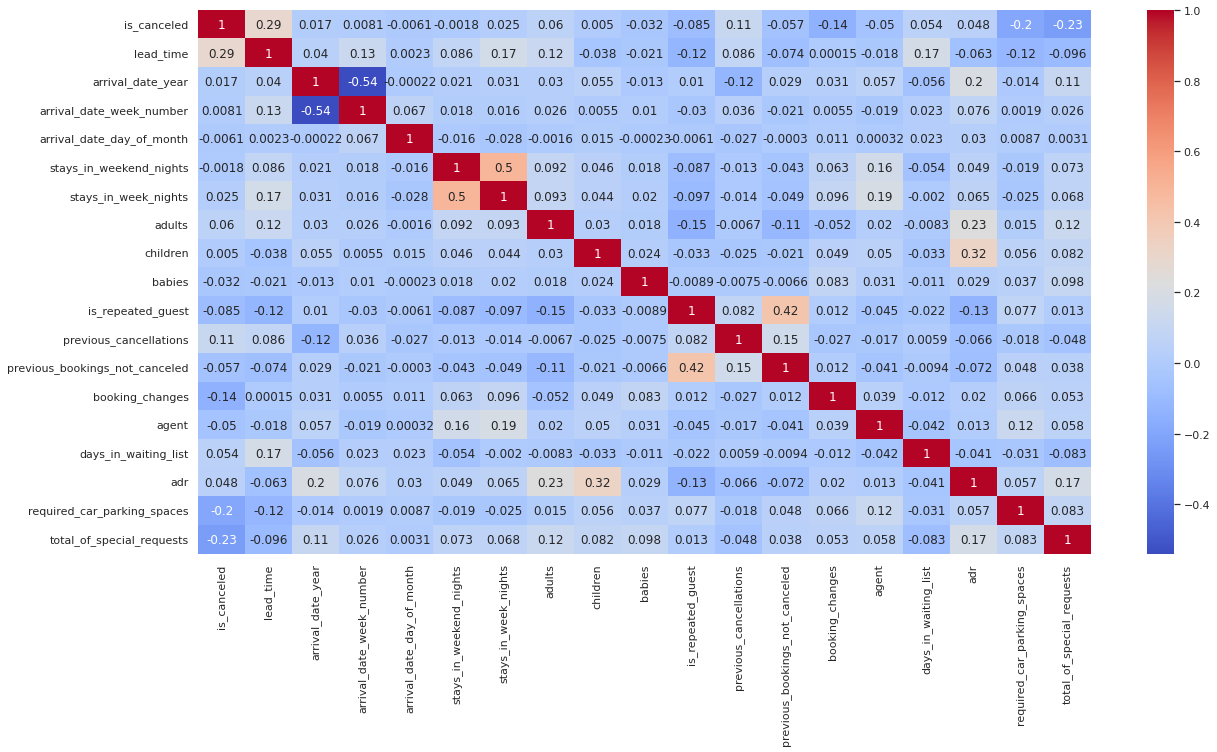

In [ ]:
# Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

#1. Overview of the type of hotel

([<matplotlib.patches.Wedge at 0x7f130c7e1ad0>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

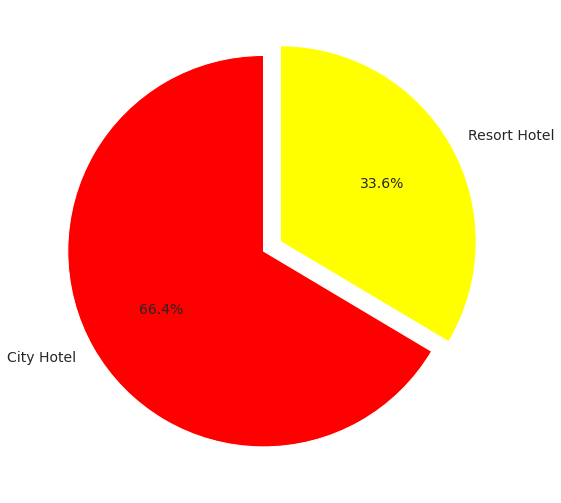

In [ ]:
plt.rcParams['figure.figsize'] = 10,9
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.1)
colors = ['red','yellow']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

city hotels are most preferred by guests thus city hotels has maximum bookings

#2. How many booking were cancelled in both type of hotels ?

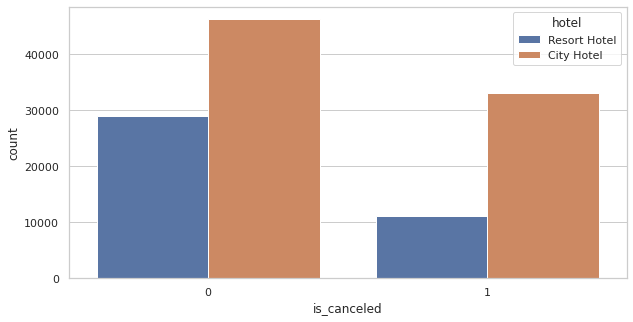

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="is_canceled", hue ='hotel',data=df)

In Resort hotel, booking cancellation is less as compared to City hotel. And overall booking cancellation is low.

#3. From where the most guests are coming ?

In [ ]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

#4.From which countries maximum number of guests are coming?

In [ ]:
# Value count of top 10 countries from where maximum number of bookings happened

Top_10_countries= df[df['is_canceled']==0]['country'].value_counts()[:10]
Top_10_countries= Top_10_countries.reset_index().rename(columns={'index':'country','country':'number of bookings'})
Top_10_countries['percentage']=(Top_10_countries['number of bookings']/Top_10_countries['number of bookings'].sum())*100
Top_10_countries

,country,number of bookings,percentage
0,PRT,21071,34.070661
1,GBR,9676,15.645566
2,FRA,8481,13.713316
3,ESP,6391,10.333899
4,DEU,6069,9.813243
5,IRL,2543,4.111893
6,ITA,2433,3.934029
7,BEL,1868,3.020454
8,NLD,1717,2.776296
9,USA,1596,2.580645


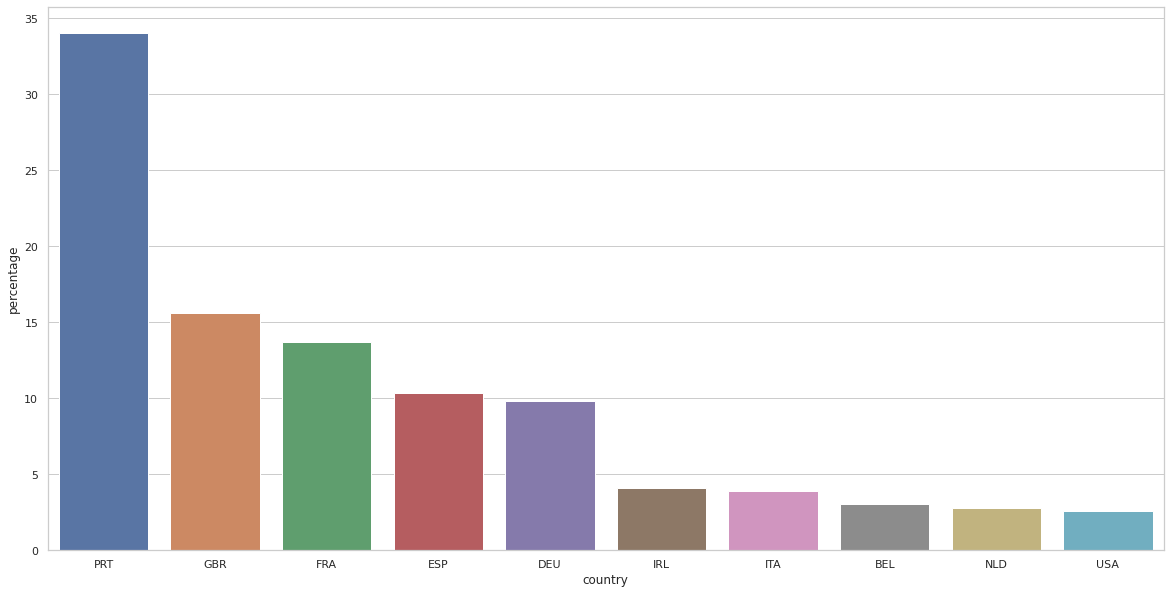

In [ ]:
# Bar plot of Top_10_countries 
plt.figure(figsize=(20,10))
Bar_plot=sns.barplot(x='country',y='percentage',data=Top_10_countries)

More visitors are from western europe, namely Portugal,France, Great Britain and Spain being the highest. Maximum from Portugal and Minimum from United States Of America

#5. In which month there is a huge number of guests stays in hotel?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



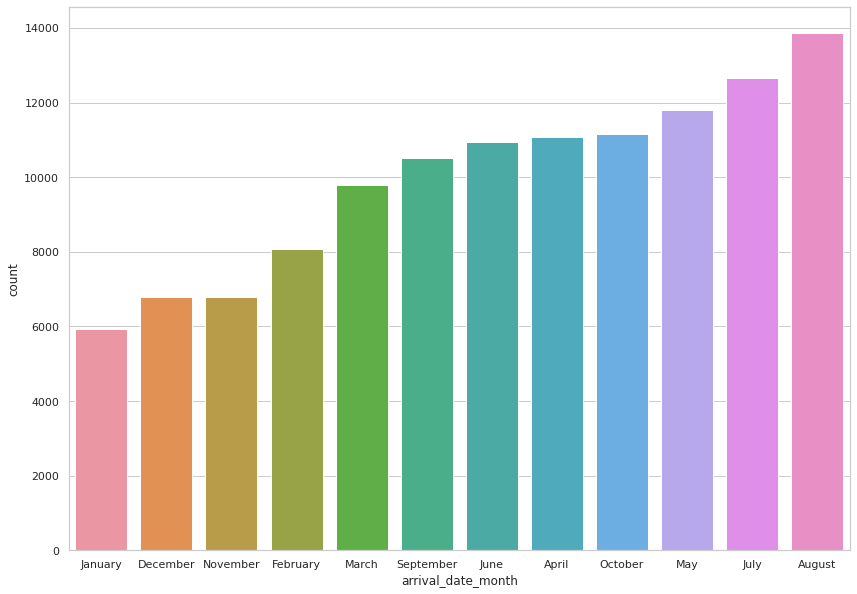

In [ ]:
plt.figure(figsize= (14,10))

adm = sns.countplot(df['arrival_date_month'], order = df['arrival_date_month'].value_counts().sort_values(ascending=True).index)

#6. How long do people stay at the hotels?

In [ ]:
filter = df['is_canceled'] == 0
data =df[filter]
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


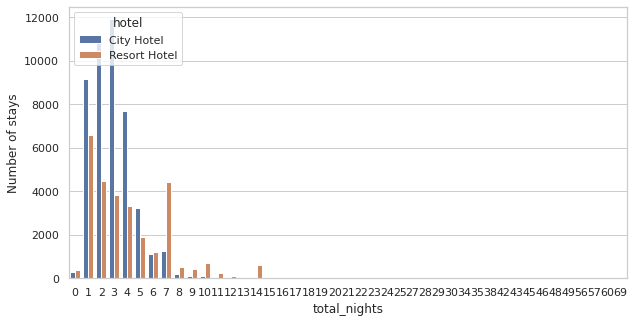

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

Most people prefer to stay at the hotels of <=5 days.

#7.What is the total stays duration in the hotel?

In [ ]:
df['stays'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['stays'].max()

69

#8. how many customers are stays on weekday nights?

Text(0.5, 1.0, 'Number of stays on weekday night')

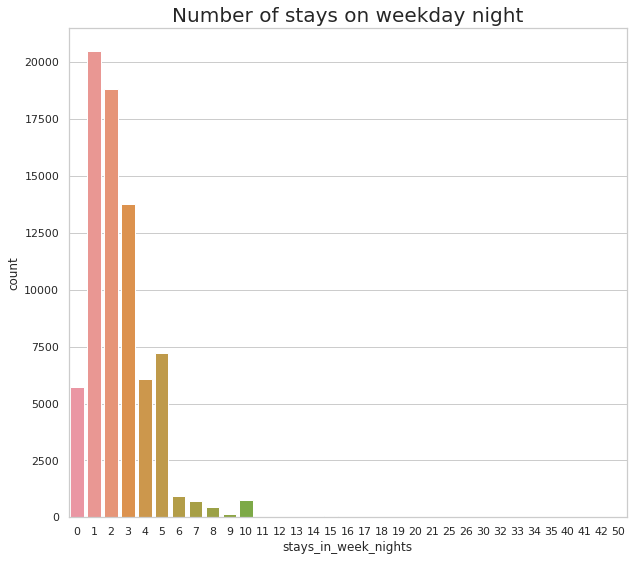

In [ ]:
sns.countplot(data = data, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 20)

 Number of stays on weekday night is most are occurs <=5

#9. find Majority of the bookings has been done by which type of customers?

Text(0.5, 1.0, 'Graph showing type of guest')

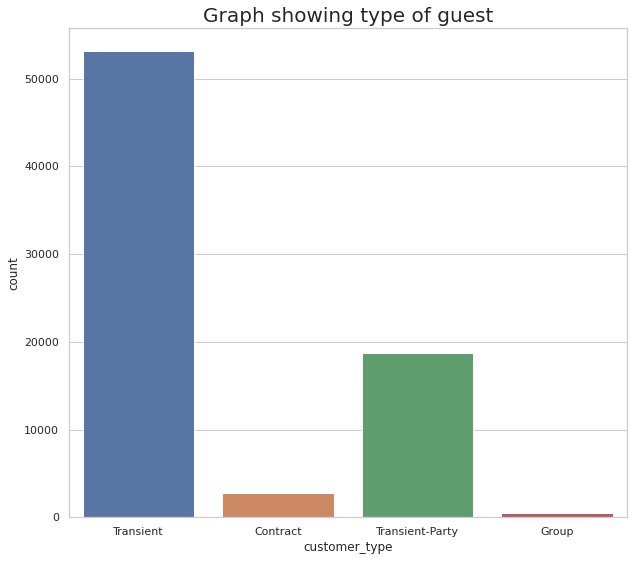

In [ ]:
sns.countplot(data = data, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

Majority of the bookings are transient.

#10. classify those customers which has visited with babies or not?

Text(0.5, 1.0, 'Number of babies')

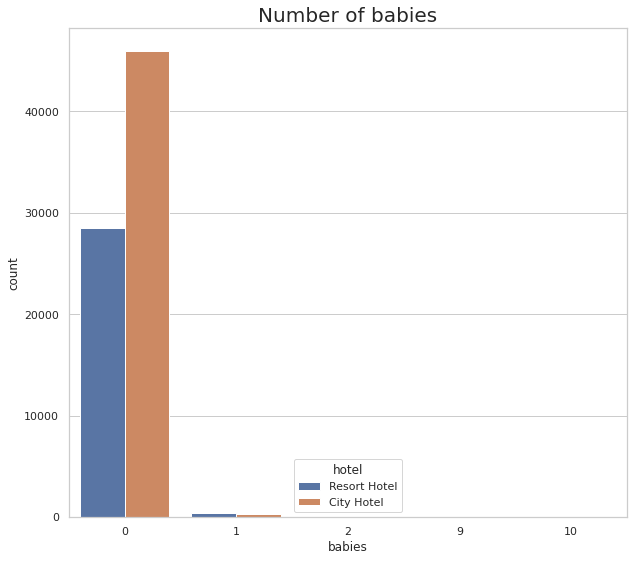

In [ ]:
sns.countplot(data = data, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)

It seems that majority of the visitors travel in pair. less number of customers are visited with babies. 

#11. Which month is the most occupied and which is the least occupied?

In [ ]:
# value_counts counts the number of times each values has appeared
(df.arrival_date_month.value_counts(normalize=True))*100

August       11.623252
July         10.604741
May           9.876037
October       9.347517
April         9.288048
June          9.162409
September     8.801407
March         8.203367
February      6.757685
November      5.690594
December      5.678868
January       4.966078
Name: arrival_date_month, dtype: float64

In [ ]:
month_df = df[df['is_canceled']==0]['arrival_date_month'].value_counts().reset_index().rename(columns = {'index':'month','arrival_date_month':'number_of_bookings'})
month_df

,month,number_of_bookings
0,August,8638
1,July,7919
2,May,7114
3,October,6914
4,March,6645
5,April,6565
6,June,6404
7,September,6392
8,February,5372
9,November,4672


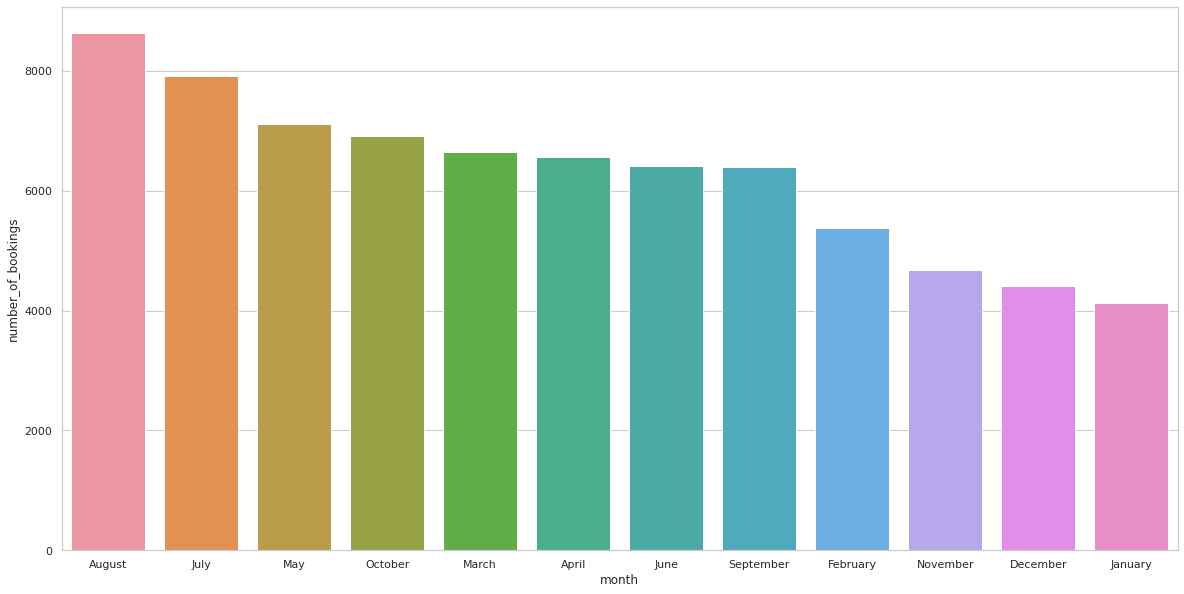

In [ ]:
# Barplot of number of bookings in each month

plt.figure(figsize=(20,10))
ax = sns.barplot(x="month", y="number_of_bookings", data = month_df)

In the month of August highest number of bookings are done.

#12.  Which months have cheaper booking rates?

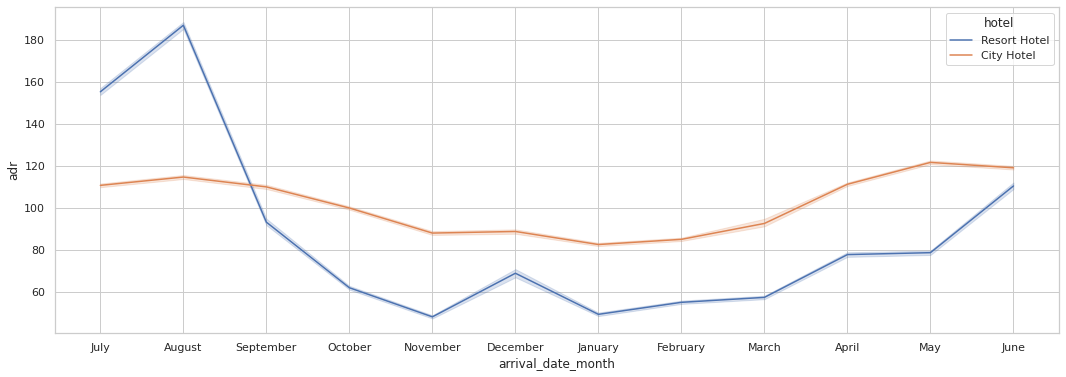

In [ ]:
# Line plot of adr for different hotel types.
plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df)
plt.show()

In [ ]:
month_hotel_type = df[df['is_canceled']==0].groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
month_hotel_type

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,4015,2550
August,5381,3257
December,2392,2017
February,3064,2308
January,2254,1868
July,4782,3137
June,4366,2038
March,4072,2573
May,4579,2535


#13.How many bookings made for both the hotels?

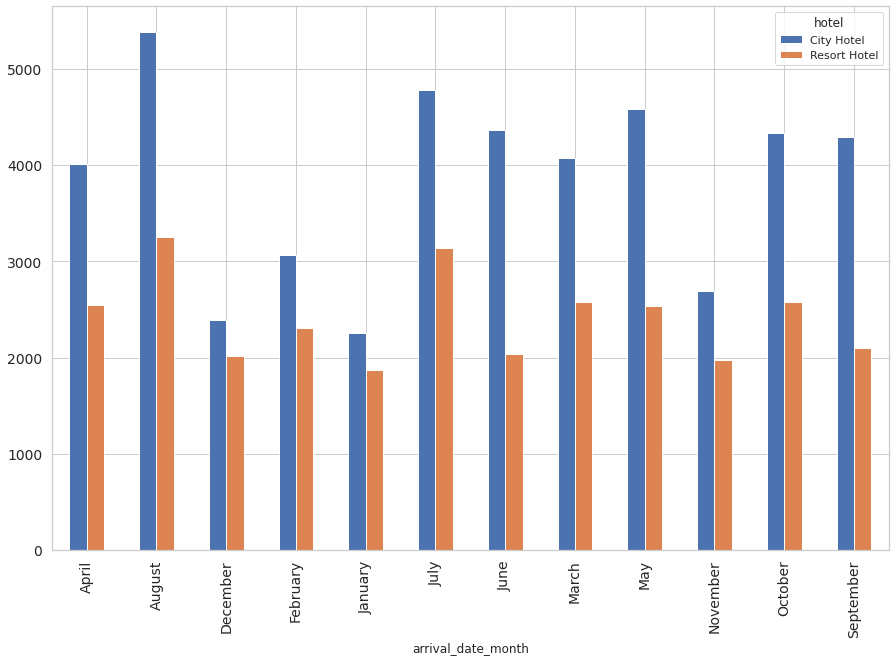

In [ ]:
# Barplot of number of bookings in each month for both hotels.

ax = month_hotel_type.plot.bar(figsize = (15,10),fontsize = 14)

the month of August highest number of bookings are done,but maximum  number of bookings are done in city hotels

#14. Percentage of cancelled bookings 

In [ ]:
# get count of each unique from from a particular column 
# and output its as a dataframe
def get_count_from_column(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd

def plot_pie_chart_from_column(df, column_label):
  df_grpd = get_count_from_column(df, column_label)

  fig, ax = plt.subplots(figsize=(14, 6))
  ax.pie(df_grpd.loc[:, 'count'], labels=df_grpd.loc[:, 'index'], autopct='%1.2f%%', startangle=90)
  ax.axis('equal')
  plt.show()

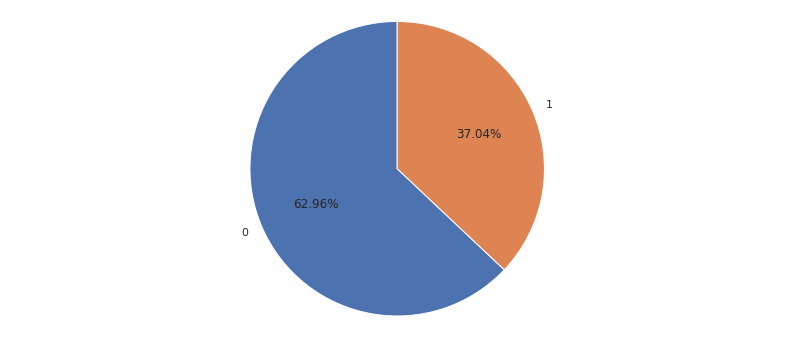

In [ ]:
# plot a pie chart to show % of cancelled bookings
plot_pie_chart_from_column(df, 'is_canceled')

We can see that around one-fourth of the total bookings get cancelled.

#15. plot a pie chart to show % of repeated guests

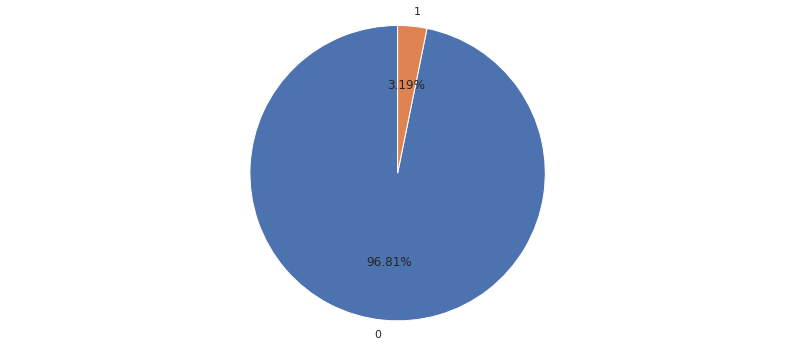

In [ ]:
plot_pie_chart_from_column(df, 'is_repeated_guest')

#16.Number of bookings made by different market segments.

In [ ]:
Not_cancelled =df[df['is_canceled']==0]
Not_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



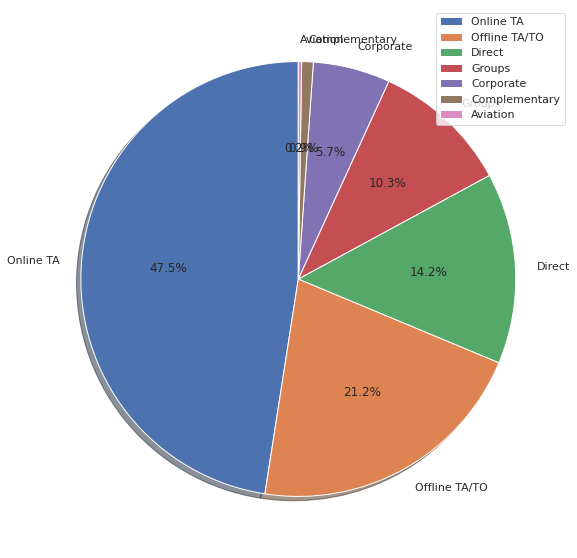

In [ ]:
plt.figure(figsize=(20,10))
segment=Not_cancelled["market_segment"].value_counts()

# pie plot

pie_plot= plt.pie(segment,
                  labels=segment.index,
                  autopct='%1.1f%%',
                  shadow=True, 
                  startangle=90
                   )
plt.legend(pie_plot, labels = segment.index, loc="best")

#17. Which is Most demandding Meal Type ?

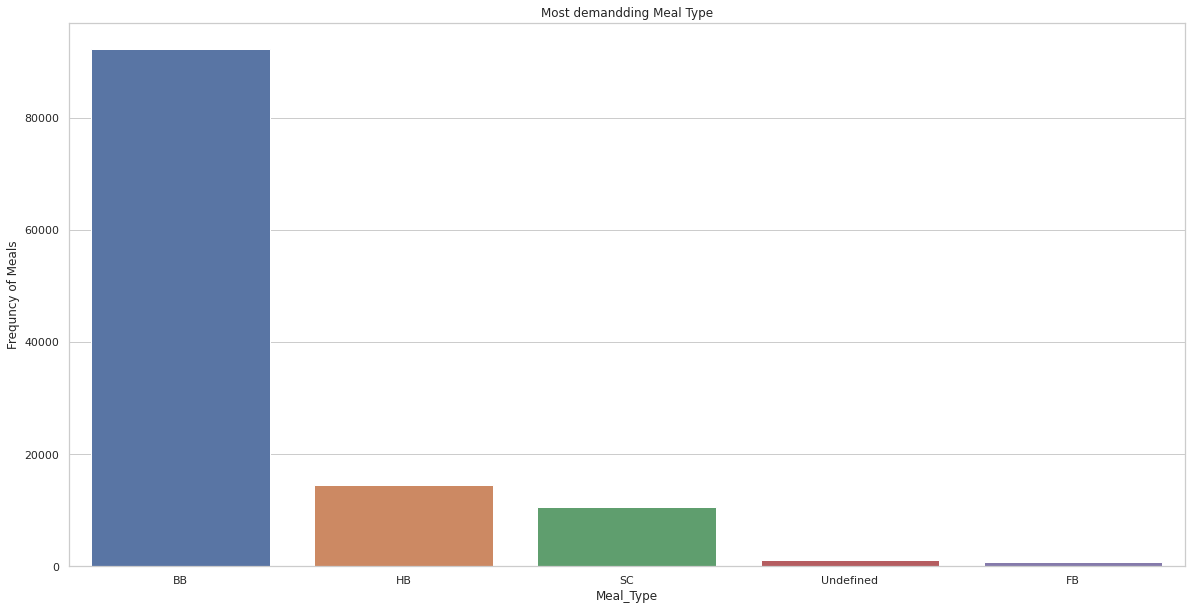

In [ ]:
Most_Preferred_meal=df['meal'].value_counts().reset_index().rename(columns={'index':'Meal_Type','meal':'Frequncy of Meals'})
Most_Preferred_meal
plt.figure(figsize=(20,10))
plt.title('Most demandding Meal Type')
ax = sns.barplot(x="Meal_Type", y="Frequncy of Meals", data =Most_Preferred_meal )

Types of meal in hotels:

1) BB - (Bed and Breakfast)\
2) HB- (Half Board)\
3) FB- (Full Board)\
4) SC- (Self Catering)

#18. Looking into deposit types

Text(0.5, 1.0, 'Graph showing types of deposits')

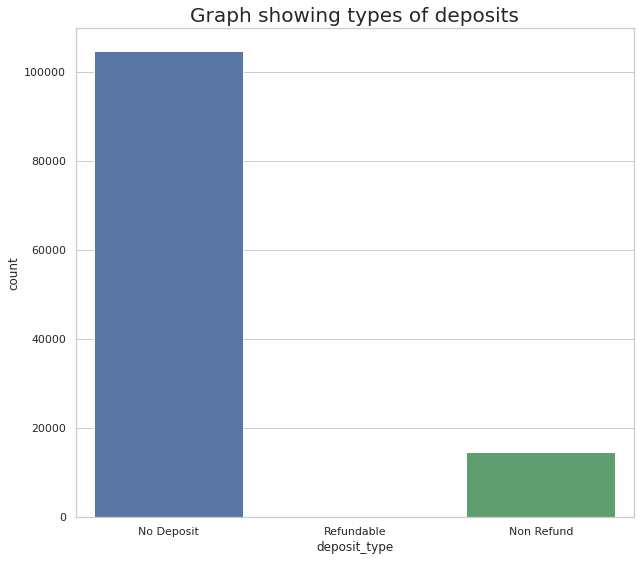

In [ ]:
sns.countplot(data = df, x = 'deposit_type').set_title('Graph showing types of deposits', fontsize = 20)

Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate.